In [3]:
# Load the data
import csv
import numpy as np
from pprint import pprint
import os

path = os.listdir("./data")[0]
with open(f"./data/{path}") as fin:
    reader = csv.reader(fin, delimiter=",")
    raw_data = list(reader)

    def convert(raw_data):
        return np.nan if raw_data == "" else int(raw_data)

    data = []
    for row in raw_data[1:]:
        data.append([])
        for col in range(3, len(raw_data[0]) - 2):
            # if "Coke" in raw_data[0][col]:
            #     continue
            data[-1].append(convert(row[col]))
    
    mat = np.array(data).T

print(mat, mat.shape)

[[nan  7.  5. ...  4.  2.  3.]
 [nan  5.  2. ...  1.  2.  6.]
 [nan nan nan ...  1. nan nan]
 ...
 [ 7.  1.  4. ...  7. nan  4.]
 [nan  3.  6. ...  3. nan nan]
 [nan  1.  3. ...  2. nan nan]] (50, 65)


In [4]:
# Get food labels
import re

pattern = r".*?\[(.*)].*"
food_labels = [re.findall(pattern, header)[0] for header in raw_data[0][3:-2]]

In [41]:
# Clean up the data a little
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

mean = np.nanmean(mat)
n_foods, n_people = mat.shape

print(f"Mean of nonzero entries: {mean}")
print(f"Count of nonzero entries: {np.count_nonzero(~np.isnan(data))}")

# Fancy matrix completion
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
imp_mean.fit(mat)
mat = imp_mean.transform(mat)

# Standardize features?
def fit_rows(mat):
    return StandardScaler().fit_transform(mat)

def fit_cols(mat):
    return StandardScaler().fit_transform(mat.T).T


for i in range(10):
    mat = fit_rows(mat)
    mat = fit_cols(mat)

np.set_printoptions(threshold=np.inf)
print(np.round(mat, 2))

for row in mat.T:
    print(np.mean(row), np.var(row))

Mean of nonzero entries: -2.8694995098004045e-18
Count of nonzero entries: 2925
[[ 0.03  0.94 -0.08  1.3  -1.45 -0.38 -0.83 -0.89  0.01  0.96  1.4   0.4
  -1.01 -0.34  0.39  0.1   0.01  0.76 -1.04  0.52 -2.39 -2.63  0.63  0.68
   1.83  0.69  0.44 -0.15  1.15  0.3  -0.28  0.4   0.57  0.94 -0.47  2.4
  -0.63 -1.46  0.67  0.03  0.02  0.79  0.33  0.64  0.01  0.28  0.04  1.52
  -1.5  -0.2  -0.75 -2.25 -2.27  0.82  0.54  0.19  0.56  1.08 -0.64 -0.38
   0.39 -0.07 -0.2  -1.5  -0.97]
 [ 0.56  0.75 -1.73  0.56  0.23  0.1   0.8   1.06 -0.71  0.57  2.07 -0.22
  -0.9   0.43 -1.32 -1.01  0.57 -0.44 -0.5  -0.6  -1.05  0.22 -0.01 -1.12
   0.1  -1.13 -0.46 -0.08 -0.87 -0.07 -1.1   1.57 -0.01  0.53 -0.03  1.54
   0.57  0.59  1.28  0.53  0.09 -0.43  1.57 -1.02  1.11  1.52  0.5   1.13
  -0.97  0.69  0.42 -2.52  0.45 -0.95 -2.69  0.24 -1.4   1.08  0.9  -1.04
   0.99 -0.37 -1.02 -0.98  1.44]
 [ 0.52  0.49  0.55  0.51  0.47  0.47 -2.75  1.38 -0.43  0.53  0.57 -0.7
  -1.85  0.39  0.52  1.68  0.52 -1.1   0.53

In [33]:
# Let"s do some PCA!
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

pc_2 = pca_2d.fit_transform(mat)
pc_3 = pca_3d.fit_transform(mat)

5

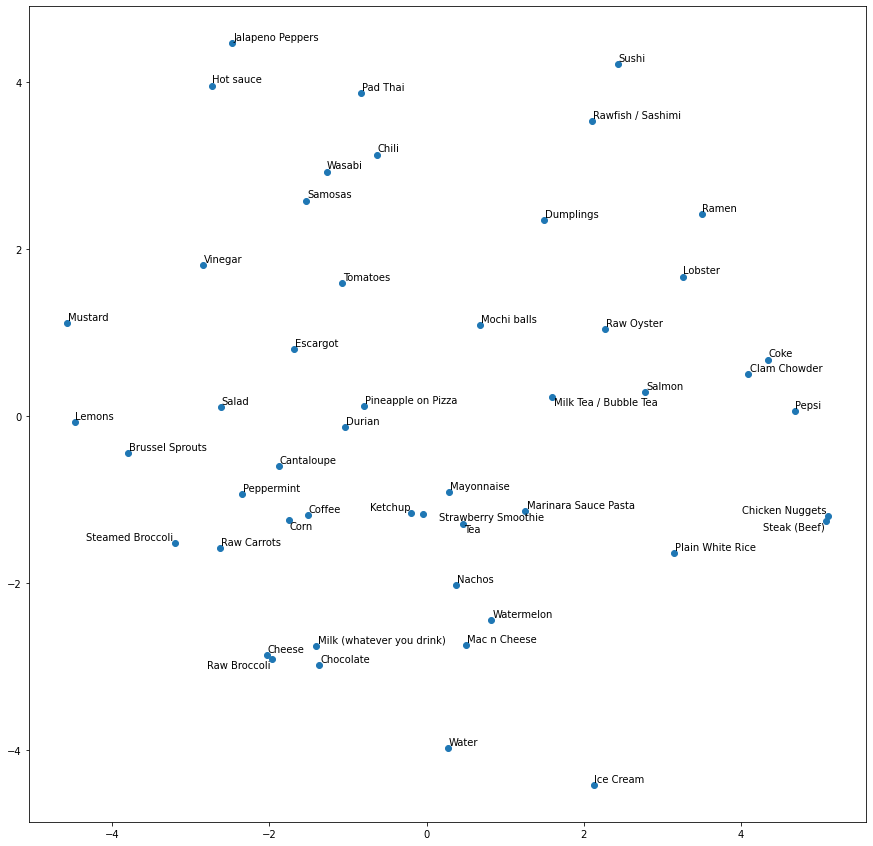

In [35]:
from matplotlib import pyplot as plt
from adjustText import adjust_text

fig = plt.figure(figsize=(15, 15))

#plot_3d = fig.add_subplot(2, 2, 1, projection="3d")
#plot_3d.scatter(*pc_3.T)

plot_2d = fig.add_subplot()
plot_2d.scatter(*pc_2.T)

labels = []
for food, coords in zip(food_labels, pc_2):
    labels.append(plt.text(coords[0], coords[1], food, ha="center", va="center"))

adjust_text(labels)

# Let's find cool correlations

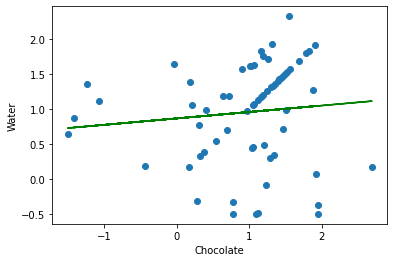

In [31]:
def correlation(food1, food2):
    idx_1 = food_labels.index(food1)
    idx_2 = food_labels.index(food2)

    x = mat[idx_1]
    y = mat[idx_2]

    plt.scatter(x, y)
    plt.xlabel(food1)
    plt.ylabel(food2)

    #calculate equation for trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    #add trendline to plot
    plt.plot(x, p(x), 'g')


correlation("Chocolate", "Water")